<h1>Neural Networks</h1>

Importing Libraries

In [1]:
from mat4py import loadmat
import numpy as np
import matplotlib as plt

Entering and formating the Data

In [10]:
data_training_set = loadmat('ex3data1.mat')
x = np.array(data_training_set['X'])
y = np.array(data_training_set['y'])

data_theta = loadmat('ex3weights.mat')
theta1 = np.array(data_theta['Theta1'])
theta2 = np.array(data_theta['Theta2'])

Selecting a few examples

In [11]:
selected_images = np.random.randint(0, 4000, 100)

images_to_display = []
x_images_to_display = []

for number in selected_images:
    x_images_to_display.append(x[number])
    temp_x = np.reshape(x[number],(20,20), order = 'F')
    images_to_display.append(temp_x)

x_images_to_display = np.insert(x_images_to_display, 0, 1, axis = 1)

Printing Examples

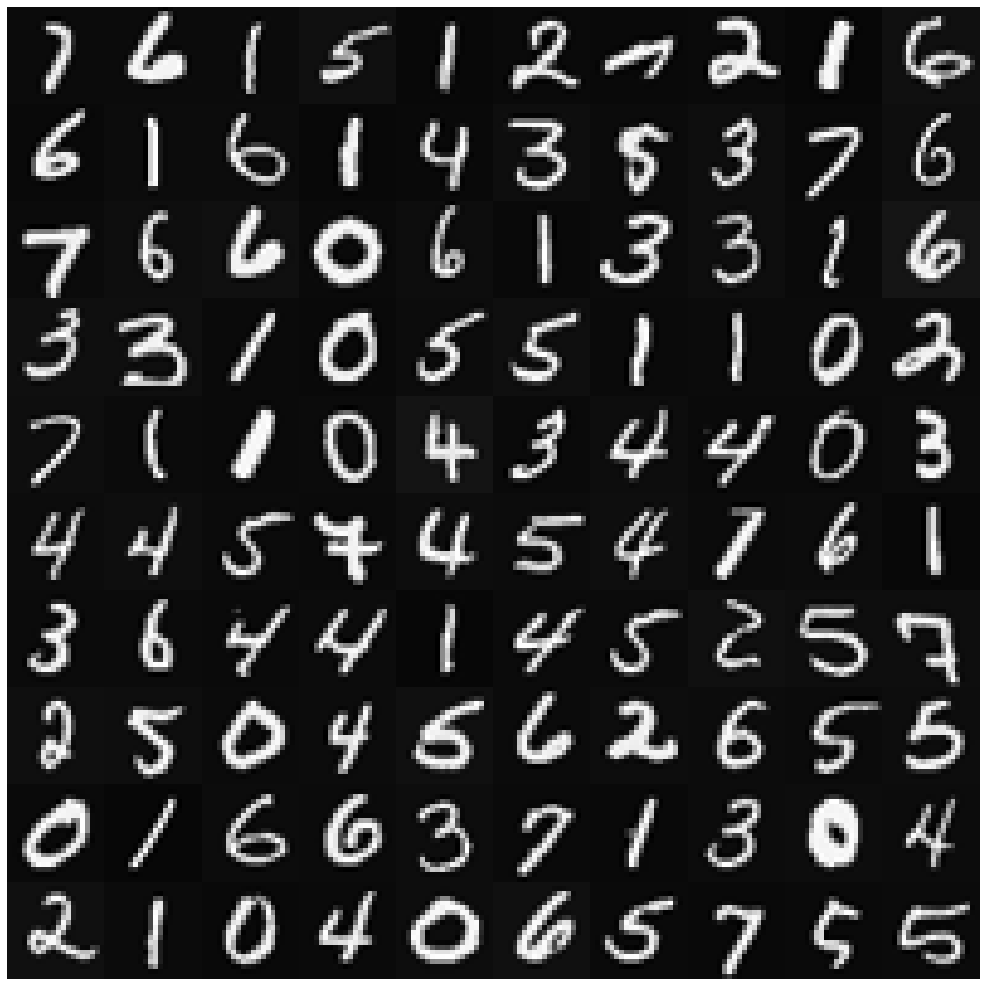

In [12]:
import matplotlib.pyplot as plt

cols = 10
rows = 10

fig, axes = plt.subplots(rows, cols, figsize=(20,20))
fig.subplots_adjust( wspace=0.0, hspace=0.0, top=0.845, bottom=0.17, left=0.17, right=0.845)

for i in range(rows):
    for j in range(cols):
            
            axes[i][j].imshow(images_to_display[i*10+j], cmap = 'gray')
            axes[i][j].set_axis_off()
            
plt.show()

Inserting the bias unit to x

In [13]:
x = np.insert(x, 0, 1, axis = 1) #Add a column of ones to the dataset

Creating the Sigmoid Function and Appy Neural Network Functions

In [17]:
def computes_sigmoid_function (z):
    sigmoid_function = 1 / (1 + np.exp(-z))
    return sigmoid_function

def apply_neural_network(x, theta1, theta2):
    
    z2 = np.reshape(x.dot(theta1.T),(1,25))
    z2 = np.insert(z2, 0, 1, axis = 1)
    a2 = computes_sigmoid_function(z2)

    z3 = a2.dot(theta2.T)
    a3 = computes_sigmoid_function(z3)

    return a3

Applying the Neural Network to the examples and printing the results

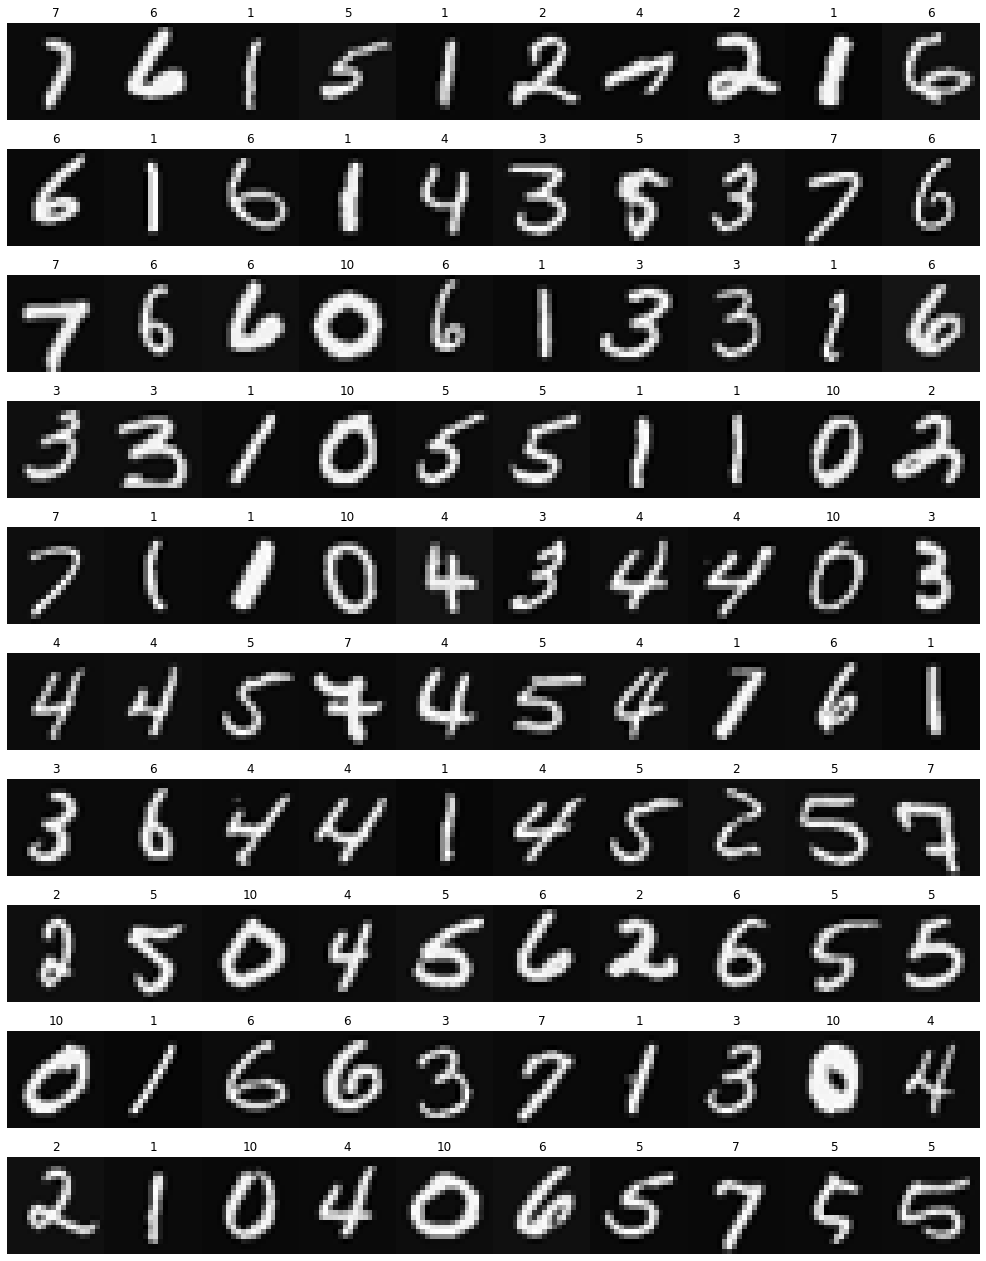

In [18]:
import matplotlib.pyplot as plt

cols = 10
rows = 10

fig, axes = plt.subplots(rows, cols, figsize=(20,20))
fig.subplots_adjust( wspace=0.0, hspace=0.0, top=1, left=0.17, right=0.845)

for i in range(rows):
    for j in range(cols):
            
            axes[i][j].imshow(images_to_display[i*10+j], cmap = 'gray')
            axes[i][j].set_axis_off()
            
            max = 0
            number = 0

            a3 = apply_neural_network(x_images_to_display[i*10+j], theta1, theta2)

            for k in range(0,10):
                current = a3[0][k]
                if current > max:
                    max = current
                    number = k + 1

            axes[i][j].set_title(f'{number}')
            # if(computes_sigmoid_function(np.reshape(x_images_to_display[i*10+j],(401,1)).T.dot(thetas[4])) > 0.5):
            #     axes[i][j].set_title('0')
            # else: 
            #     axes[i][j].set_title('NOT 0')
            
plt.show()

Calculating Accuracy

In [23]:
hits = 0

for j in range(5000):
    max = 0
    number = 0

    a3 = apply_neural_network(x[j], theta1, theta2)

    for i in range(0,10):
        current = a3[0][i] 
        if current >= max:
            max = current
            number = i + 1
    
    if number == y[j]:
        hits += 1

print(f'The accuracy for this training set is {(hits/5000)*100:.2f}%.')

The accuracy for this training set is 97.52%.
